In [1]:
using Distributions, Turing
using Gadfly

In [2]:
@model gdemo(x) = begin
  s ~ InverseGamma(2,3)
  m ~ Normal(0,sqrt(s))
  x[1] ~ Normal(m, sqrt(s))
  x[2] ~ Normal(m, sqrt(s))
  return s, m
end

gdemo (generic function with 2 methods)

In [9]:
s = sample(gdemo([1.5, 2]), HMC(1000, 0.25, 5));

[Turing]:  Assume - `s` is a parameter (ignoring `s` found in global scope)
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Assume - `m` is a parameter
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Observe - `x` is an observation
  in @~(::Any, ::Any) at compiler.jl:28


[HMC] Sampling...100% Time: 0:00:01

[HMC] Finished with
  Running time    = 1.2619049479999997;
  Accept rate     = 0.982;
  #lf / sample    = 4.995;
  #evals / sample = 4.997.


In [10]:
describe(s)

Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

Empirical Posterior Estimates:
      Mean        SD      Naive SE     MCSE       ESS   
 m  1.2688603 1.0246399 0.032401959 0.09447533 117.62665
lp -5.7684585 1.5000334 0.047435221 0.14994876 100.07281
 s  2.2542235 3.4928293 0.110452962 0.31478546 123.11909

Quantiles:
       2.5%       25.0%     50.0%      75.0%     97.5%  
 m  -0.5528809  0.7713037  1.185621  1.6995207  3.183212
lp -10.1423503 -6.0306783 -5.296033 -4.8573921 -4.624817
 s   0.6359921  1.0558406  1.509597  2.2555235  8.144453



In [5]:
p = plot(s);

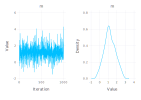

In [6]:
hstack(p[1:2])

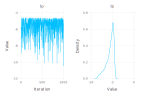

In [7]:
hstack(p[3:4])

In [8]:
heideldiag(s)

   Burn-in Stationarity p-value    Mean     Halfwidth Test
 m       0            1  0.6379  1.1899127 0.05686594    1
lp       0            1  0.9650 -5.6672555 0.10428118    1
 s       0            1  0.5463  1.9033045 0.10104858    1

